In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


/kaggle/input/weather-prediction/seattle-weather.csv


In [2]:
import pandas as pd
import  matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/weather-prediction/seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<Axes: >

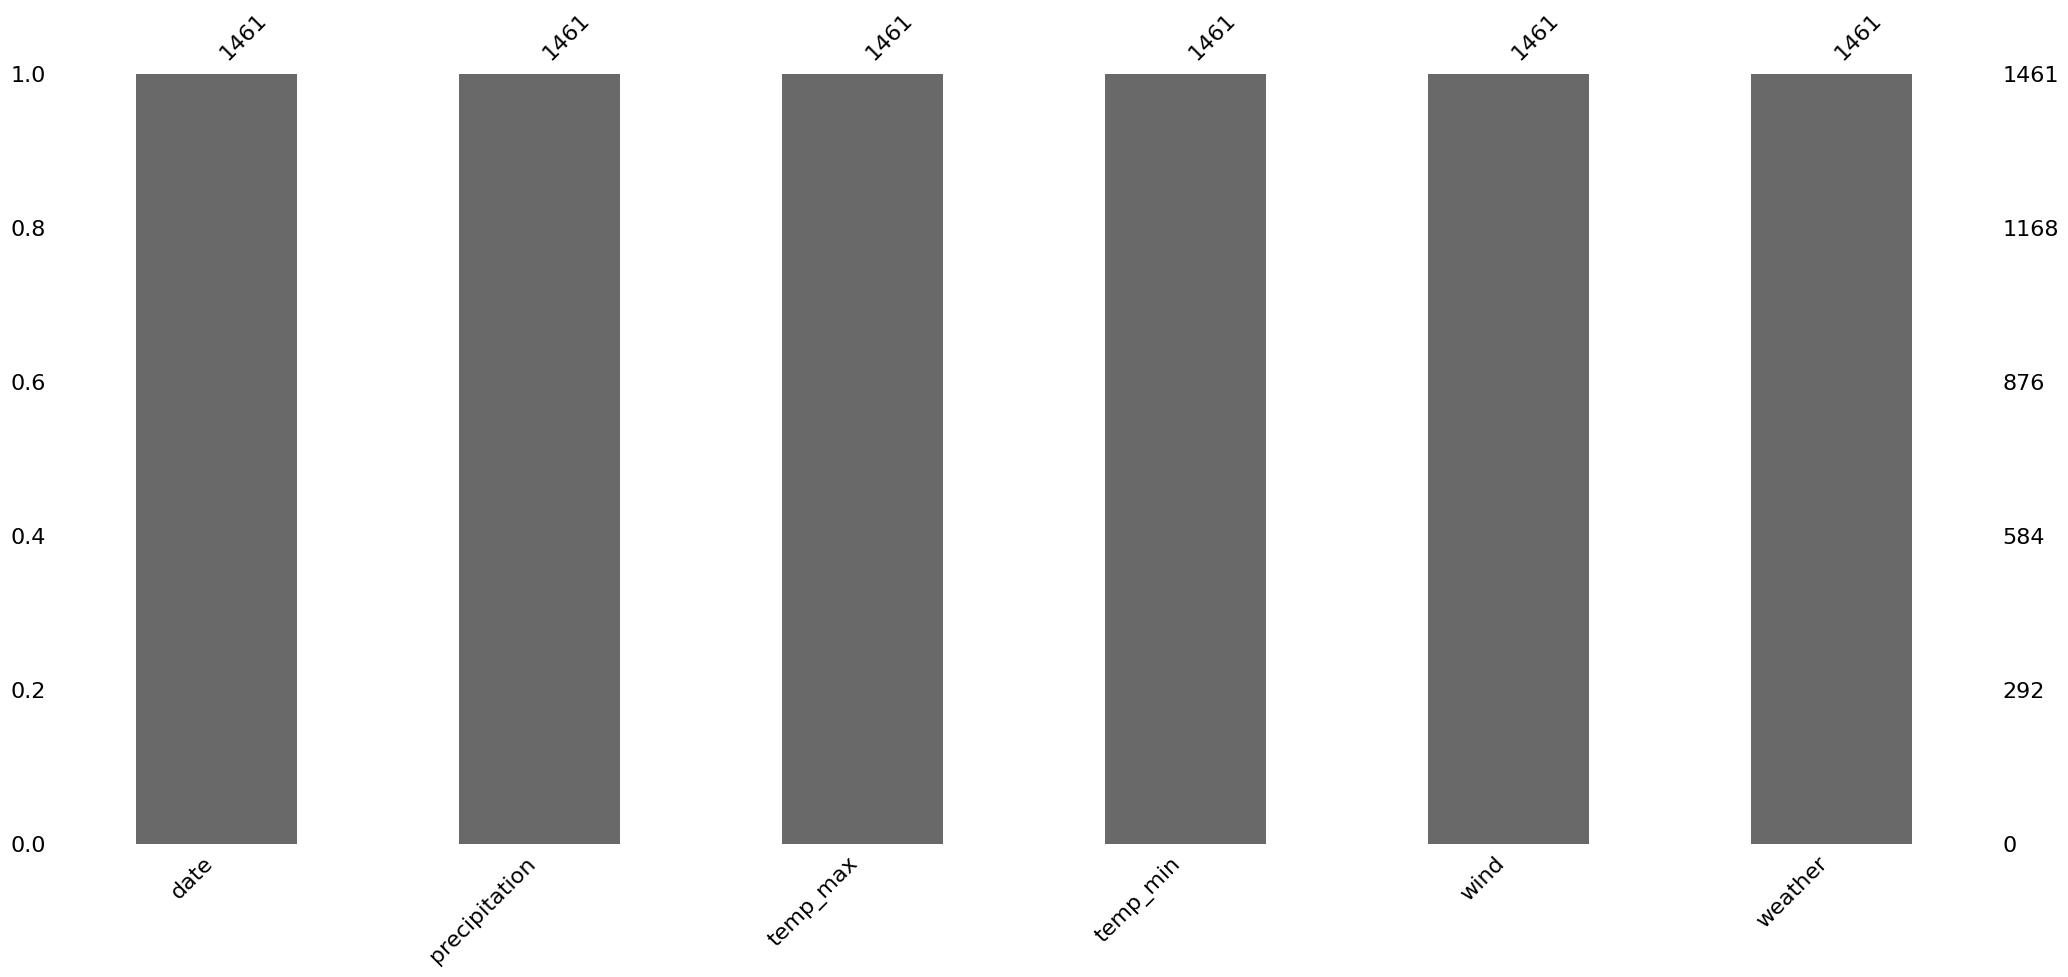

In [4]:
msno.bar(data)

<Axes: >

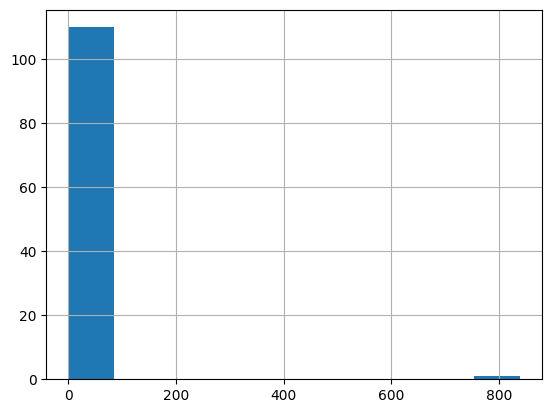

In [5]:
data.precipitation.value_counts().hist(bins = 10)

<Axes: xlabel='weather', ylabel='count'>

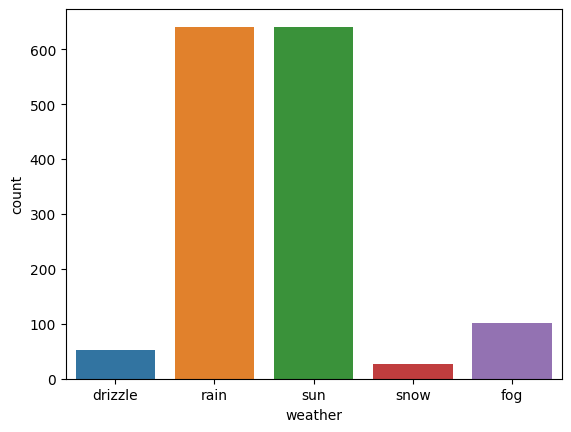

In [6]:
sns.countplot(x='weather',data=data)

<Axes: xlabel='weather', ylabel='precipitation'>

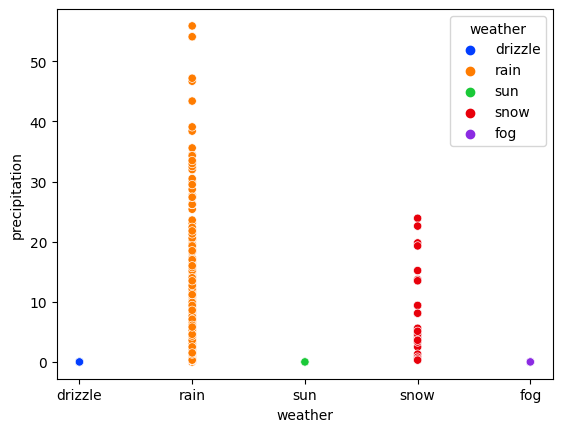

In [7]:
sns.scatterplot(x='weather',y='precipitation', data=data,palette='bright',hue='weather')

<Axes: ylabel='temp_min'>

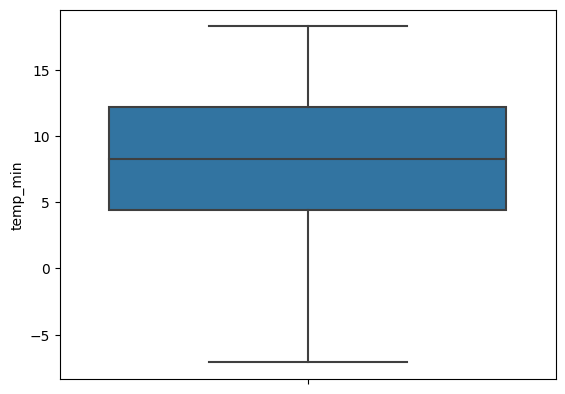

In [8]:
sns.boxplot(y='temp_min',data=data)

<Axes: xlabel='temp_min', ylabel='Count'>

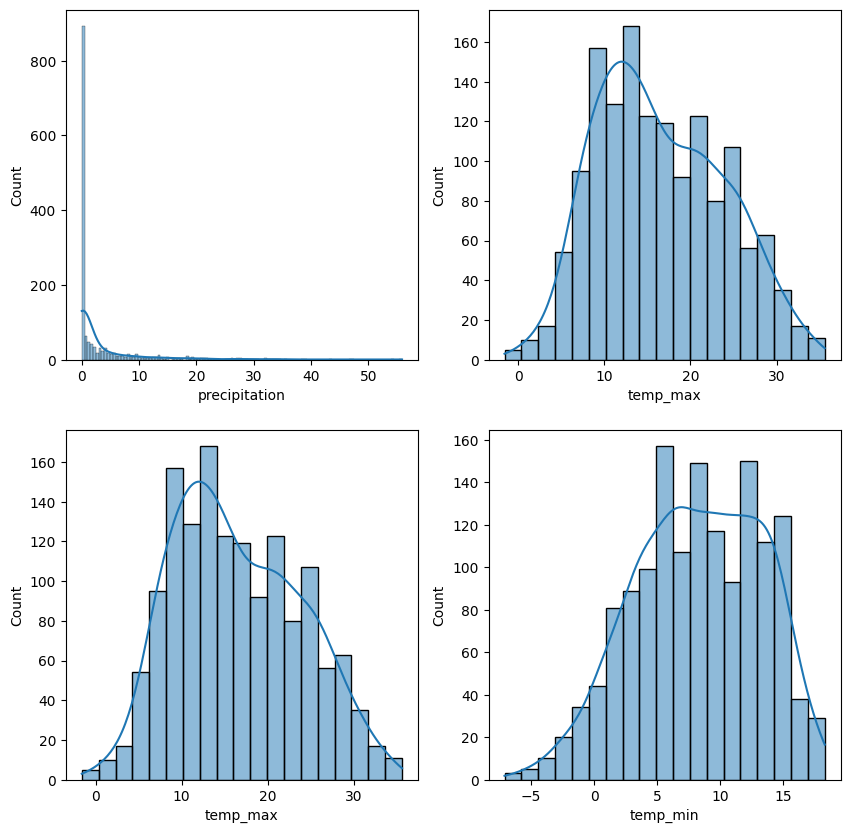

In [9]:
fig, axes=plt.subplots(2,2,figsize=(10,10))
sns.histplot(x='precipitation',kde=True,data=data,ax=axes[0,0])
sns.histplot(x='temp_max',kde=True,data=data,ax=axes[0,1])
sns.histplot(x='temp_max',kde=True,data=data,ax=axes[1,0])
sns.histplot(x='temp_min',kde=True,data=data,ax=axes[1,1])

In [10]:
x=data.drop(columns=['date','weather'],axis=1)
y=data['weather']

In [11]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8,random_state=101)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.predict(x_train)

array(['rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'rain', 'rain',
       'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 'rain', 'rain', 'r

In [15]:
model.fit(x_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.predict(x_test)

array(['sun', 'rain', 'sun', ..., 'sun', 'rain', 'rain'], dtype=object)

In [17]:
model.score(x_test,y_test)

0.8383233532934131

In [18]:
model.predict([[18,7,6,7]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['rain'], dtype=object)